In [39]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
from google.colab import files

In [41]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [42]:
df = pd.read_excel('/content/drive/MyDrive/Bootcamp Data Science/Machine Learning/Clase 7 /Jupyter/imdb_anime.xlsx')

In [43]:
#Vamos a revisar la cantidad de datos que tienen nuestro df recien cargado
df.shape

(45717, 13)

In [44]:
#ahora daremos una mini vista para reconocer como esta montado
df.head()

,Title,Genre,User Rating,Number of Votes,Runtime,Year,Summary,Stars,Certificate,Metascore,Gross,Episode,Episode Title
0,One Piece,"Animation, Action, Adventure",8.9,187689,24 min,(1999– ),Follows the adventures of Monkey D. Luffy and ...,"Mayumi Tanaka,Laurent Vernin,Akemi Okamura,Ton...",TV-14,NaN,187689,0,NaN
1,Teenage Mutant Ninja Turtles: Mutant Mayhem,"Animation, Action, Adventure",7.4,28895,99 min,-2023,The film follows the Turtle brothers as they w...,NaN,PG,74,28895,0,NaN
2,The Super Mario Bros. Movie,"Animation, Adventure, Comedy",7.1,189108,92 min,-2023,A plumber named Mario travels through an under...,NaN,PG,46,189108,0,NaN
3,Attack on Titan,"Animation, Action, Adventure",9.1,434457,24 min,(2013–2023),After his hometown is destroyed and his mother...,"Josh Grelle,Bryce Papenbrook,Yûki Kaji,Yui Ish...",TV-MA,NaN,434457,0,NaN
4,Jujutsu Kaisen,"Animation, Action, Adventure",8.5,82909,24 min,(2020– ),A boy swallows a cursed talisman - the finger ...,"Junya Enoki,Yûichi Nakamura,Adam McArthur,Yuma...",TV-MA,NaN,82909,0,NaN


In [45]:
#De inmediato notamos que hay NaN, que eliminaremos prontamente, pero tambien notamos que hay datos no importantes para nuestro analisis, como "Episode Title",
#Certificate, "Genre" debe ser separado, el "Year" tambien hay que manipularlo, "Summary" y "Stars" en el punto de vista de analisis numerico, no aporta mucho
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45717 entries, 0 to 45716
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Title            45717 non-null  object
 1   Genre            45717 non-null  object
 2   User Rating      25009 non-null  object
 3   Number of Votes  25009 non-null  object
 4   Runtime          32549 non-null  object
 5   Year             45591 non-null  object
 6   Summary          23547 non-null  object
 7   Stars            13676 non-null  object
 8   Certificate      28694 non-null  object
 9   Metascore        341 non-null    object
 10  Gross            25009 non-null  object
 11  Episode          45717 non-null  object
 12  Episode Title    34910 non-null  object
dtypes: object(13)
memory usage: 4.5+ MB


Notamos que esta bien disparejo el DF, aparte de que la mayoria de ellos esta en Object, como tenemos variables numericas debemos cambiarlas, pero antes vamos a sacar los duplicados, si es que hay

In [46]:
#Si tiene deberia darnos la suma
df.duplicated().sum()

874

In [47]:
#En una revision previa al excel, encontre que una fila tenia la repeticion del las columnas, vamos a ver cual es
df.query('Title == "Title"')

,Title,Genre,User Rating,Number of Votes,Runtime,Year,Summary,Stars,Certificate,Metascore,Gross,Episode,Episode Title
840,Title,Genre,User Rating,Number of Votes,Runtime,Year,Summary,Stars,Certificate,Metascore,Gross,Episode,Episode Title


In [48]:
#Ahora que sabemos, vamos a eliminarla y reiniciar el indice, para que no se salte el numero eliminado
df1 = df.drop(840)
df.reset_index(drop=True)

,Title,Genre,User Rating,Number of Votes,Runtime,Year,Summary,Stars,Certificate,Metascore,Gross,Episode,Episode Title
0,One Piece,"Animation, Action, Adventure",8.9,187689,24 min,(1999– ),Follows the adventures of Monkey D. Luffy and ...,"Mayumi Tanaka,Laurent Vernin,Akemi Okamura,Ton...",TV-14,NaN,187689,0,NaN
1,Teenage Mutant Ninja Turtles: Mutant Mayhem,"Animation, Action, Adventure",7.4,28895,99 min,-2023,The film follows the Turtle brothers as they w...,NaN,PG,74,28895,0,NaN
2,The Super Mario Bros. Movie,"Animation, Adventure, Comedy",7.1,189108,92 min,-2023,A plumber named Mario travels through an under...,NaN,PG,46,189108,0,NaN
3,Attack on Titan,"Animation, Action, Adventure",9.1,434457,24 min,(2013–2023),After his hometown is destroyed and his mother...,"Josh Grelle,Bryce Papenbrook,Yûki Kaji,Yui Ish...",TV-MA,NaN,434457,0,NaN
4,Jujutsu Kaisen,"Animation, Action, Adventure",8.5,82909,24 min,(2020– ),A boy swallows a cursed talisman - the finger ...,"Junya Enoki,Yûichi Nakamura,Adam McArthur,Yuma...",TV-MA,NaN,82909,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
45712,Demon Slayer: Kimetsu no Yaiba,"Animation, Action, Adventure",7.3,3432,24 min,(2019– ),Tanjiro heads to his next location southeast; ...,NaN,TV-14,NaN,3432,1,Tsuzumi Mansion
45713,Demon Slayer: Kimetsu no Yaiba,"Animation, Action, Adventure",7.9,3309,24 min,(2019– ),Tanjiro gets separated from Zenitsu when he en...,NaN,TV-MA,NaN,3309,1,"The Boar Bares Its Fangs, Zenitsu Sleeps"
45714,One Piece,"Animation, Action, Adventure",9.4,2743,NaN,(1999– ),Carrot tells Sanji the news about Pedro. Germa...,"Mayumi Tanaka,Tom Henry,Masako Katsuki,Mami Ko...",TV-14,NaN,2743,1,Time for Farewell! Pudding's One Last Request!
45715,Marmalade Boy,"Animation, Comedy, Drama",NaN,NaN,24 min,(1994–2005),NaN,"Ogie Banks,Deborah Sale Butler,John DeMita,Ric...",Not Rated,NaN,NaN,1,Hijiri naru yoru (ivu nanoni hitori bocchi...)


In [49]:
# Eliminar duplicados
sin_duplicados = df1.drop_duplicates()

In [50]:
sin_duplicados.shape

(44842, 13)

In [51]:
df2 = sin_duplicados
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44842 entries, 0 to 45716
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Title            44842 non-null  object
 1   Genre            44842 non-null  object
 2   User Rating      24183 non-null  object
 3   Number of Votes  24183 non-null  object
 4   Runtime          31764 non-null  object
 5   Year             44718 non-null  object
 6   Summary          22706 non-null  object
 7   Stars            13138 non-null  object
 8   Certificate      27892 non-null  object
 9   Metascore        183 non-null    object
 10  Gross            24183 non-null  object
 11  Episode          44842 non-null  object
 12  Episode Title    34875 non-null  object
dtypes: object(13)
memory usage: 4.8+ MB


Genial! ya contamos con todo el analisis anterior, ahora debemos transformar los datos restantes, eliminar los que no sean relevantes para nuestra busqueda, obtener outliers para poder eliminar estas diferencias, ademas de transformarlos a numericos para operar comodamente con ellos.

Haremos una transformacion de datos, hay columnas que tienen datos numericos. Sin embargo, por caracteres no numericos estos estan en formato 'Object', debemos modificarlos primero para transformarlos posteriormente en numeros, esta es la forma correcta para encontrar correlaciones numericas.


In [52]:
#Primero procedemos a la columna 'User Rating'
# Verificar los valores únicos en la columna
print(df2['User Rating'].unique())


[8.9 7.4 7.1 9.1 8.5 8.6 7.8 8.2 7.5 8.7 7.7 6.9 7.6 8.4 8.8 8.1 9 5.7 8.3
 nan 8 6.8 7.3 6.5 7.2 6.7 6.2 7.9 6.1 7 6.4 6.6 5.6 6.3 5.8 6 4.8 5.4 5.3
 5.9 5.5 5 4.9 5.1 4.6 9.2 4.5 4.4 5.2 4.1 3.9 3.7 2.6 9.4 1.7 1.8 4.7 3.8
 4.3 9.8 4.2 3.1 3.6 1.5 3 2.7 4 2.9 3.4 3.3 3.5 1 2.2 2.1 3.2 1.6 2.3 2
 9.3 9.5 2.4 2.5 9.7 9.9 9.6 2.8 1.9]


In [53]:
# Convertir la columna 'User Rating' a numérico (esto marcará valores no numéricos como NaN)
df2['User Rating'] = pd.to_numeric(df2['User Rating'], errors='coerce')
print(df2.info())

<class 'pandas.core.frame.DataFrame'>
Index: 44842 entries, 0 to 45716
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Title            44842 non-null  object 
 1   Genre            44842 non-null  object 
 2   User Rating      24183 non-null  float64
 3   Number of Votes  24183 non-null  object 
 4   Runtime          31764 non-null  object 
 5   Year             44718 non-null  object 
 6   Summary          22706 non-null  object 
 7   Stars            13138 non-null  object 
 8   Certificate      27892 non-null  object 
 9   Metascore        183 non-null    object 
 10  Gross            24183 non-null  object 
 11  Episode          44842 non-null  object 
 12  Episode Title    34875 non-null  object 
dtypes: float64(1), object(12)
memory usage: 4.8+ MB
None


In [54]:
#Ahora con la columna 'Number of Votes'
# Asegurarse de que la columna es de tipo string (texto) antes de reemplazar
df2['Number of Votes'] = df2['Number of Votes'].astype(str)  # Convertir a texto

# Quitar las comas
df2['Number of Votes'] = df2['Number of Votes'].str.replace(',', '')

# Convertir la columna a numérico (float)
df2['Number of Votes'] = pd.to_numeric(df2['Number of Votes'], errors='coerce')

# Verificar los valores únicos
print(df2['Number of Votes'].unique())

print(df2.info())

[187689.  28895. 189108. ...   3375.   3309.   2743.]
<class 'pandas.core.frame.DataFrame'>
Index: 44842 entries, 0 to 45716
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Title            44842 non-null  object 
 1   Genre            44842 non-null  object 
 2   User Rating      24183 non-null  float64
 3   Number of Votes  24183 non-null  float64
 4   Runtime          31764 non-null  object 
 5   Year             44718 non-null  object 
 6   Summary          22706 non-null  object 
 7   Stars            13138 non-null  object 
 8   Certificate      27892 non-null  object 
 9   Metascore        183 non-null    object 
 10  Gross            24183 non-null  object 
 11  Episode          44842 non-null  object 
 12  Episode Title    34875 non-null  object 
dtypes: float64(2), object(11)
memory usage: 4.8+ MB
None


Tenemos listos nuestra columna number of Votes, pero para redondear el valor debemos reemplazar los Nan primero, asi que quedara pendiente por ahora

In [55]:
#Ahora la columna 'Year', esta horrible columna tiene una mezcla de todos los valores, hay datos faltantes, guiones largos, cortos y caracteres no relacionados al año
## para evitarlo usaremos el siguiente codigo:

df2['Year'] = df2['Year'].str.extract(r'(\d{4})')

Este comando se encarga de tomar los primeros 4 digitos que encuentre en cada fila de la columna 'Year' aquellos que no cumplan con las condiciones seran reemplazados con NaN, es importante señalar que se reduce considerablemente la cantidad de informacion aqui, porque hay filas que solo tienen la fecha de termino, por ende, nos reemplazan muchas filas de ahi, que eventualmente saltaremos, el año no es relevante para llenarse con Outliers, sin embargo nos sirve para otra informacion, en el momento de correlaciones.


In [56]:
#Ahora, pasaremos los numeros restantes a formato numerico, para posterior modificacion.
df2['Year'] = pd.to_numeric(df2['Year'], errors='coerce')

In [57]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44842 entries, 0 to 45716
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Title            44842 non-null  object 
 1   Genre            44842 non-null  object 
 2   User Rating      24183 non-null  float64
 3   Number of Votes  24183 non-null  float64
 4   Runtime          31764 non-null  object 
 5   Year             34857 non-null  float64
 6   Summary          22706 non-null  object 
 7   Stars            13138 non-null  object 
 8   Certificate      27892 non-null  object 
 9   Metascore        183 non-null    object 
 10  Gross            24183 non-null  object 
 11  Episode          44842 non-null  object 
 12  Episode Title    34875 non-null  object 
dtypes: float64(3), object(10)
memory usage: 4.8+ MB


In [58]:
#Creo que para esta ocasion, hay que considerar la columna 'Gross' ya que hace notar la ganancia del anime en emision,
## un valor importante cuando queremos saber correlaciones, o si en este caso nos importa saber la ganancia monetaria (un valor sumamente importante)
### para compararla con otras columnas.

df2['Gross'] = pd.to_numeric(df2['Gross'], errors='coerce')

In [59]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44842 entries, 0 to 45716
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Title            44842 non-null  object 
 1   Genre            44842 non-null  object 
 2   User Rating      24183 non-null  float64
 3   Number of Votes  24183 non-null  float64
 4   Runtime          31764 non-null  object 
 5   Year             34857 non-null  float64
 6   Summary          22706 non-null  object 
 7   Stars            13138 non-null  object 
 8   Certificate      27892 non-null  object 
 9   Metascore        183 non-null    object 
 10  Gross            24183 non-null  float64
 11  Episode          44842 non-null  object 
 12  Episode Title    34875 non-null  object 
dtypes: float64(4), object(9)
memory usage: 4.8+ MB


In [60]:
#Aqui ya tenemos listo nuestro df con los datos de forma numerica, ahora podemos ir a modificar y rellenar los outliers

Ahora, damos comienzo a la eliminacion de Outliers, o valores atipicos. Sera por medio del metodo Z-score. Este es uno de los metodos para reconocer los valores atipicos deacuerdo al numero de desviaciones standard

In [61]:
def detect_outliers_zscore(data, threshold=2):
    # Calcular el Z-score para cada punto de datos
    z_scores = (data - np.mean(data)) / np.std(data)
    # Encontrar valores atípicos basados en el umbral
    outliers = np.abs(z_scores) > threshold
    return outliers

def plot_outliers(data, outliers):
    # Crear un gráfico de dispersión para los valores normales
    plt.figure(figsize=(10, 6))
    plt.scatter(data[~outliers], [1] * len(data[~outliers]), label='Valores Normales', color='blue', s=50)
    # Crear un gráfico de dispersión para los valores atípicos
    plt.scatter(data[outliers], [1] * len(data[outliers]), label='Valores Atípicos', color='red', marker='x', s=100)

    plt.title('Detección de Outliers con Z-score (tresh=2)')
    plt.xlabel('Datos')
    plt.yticks([])  # Ocultar las marcas en el eje Y
    plt.legend()
    plt.grid(True)
    plt.show()

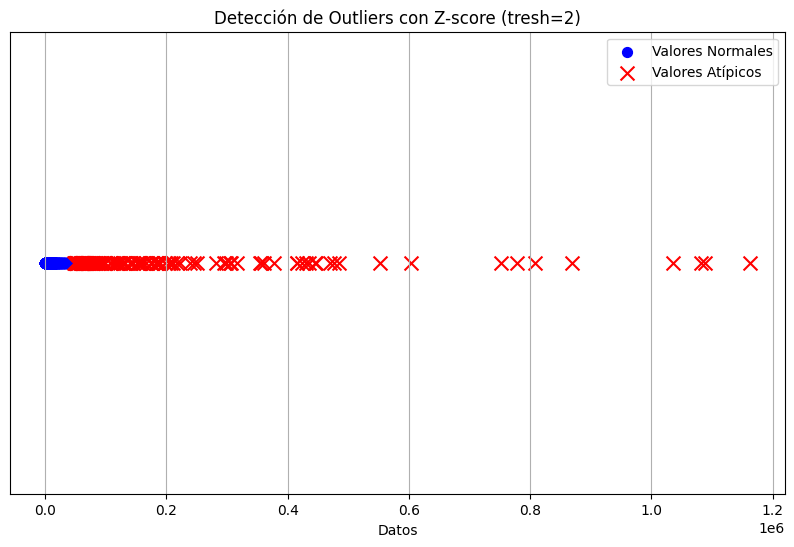

In [62]:
outliers = detect_outliers_zscore(df2['Gross'], threshold=2)
plot_outliers(df2['Gross'], outliers)

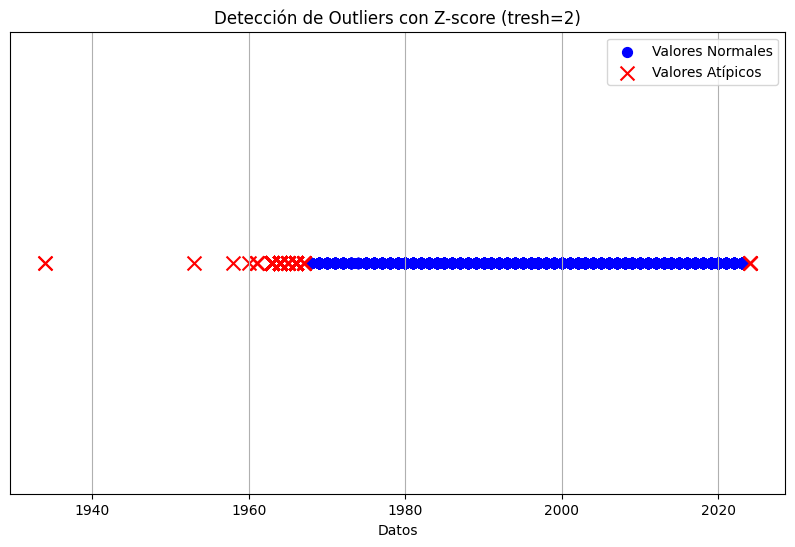

In [63]:
outliers = detect_outliers_zscore(df2['Year'], threshold=2)
plot_outliers(df2['Year'], outliers)

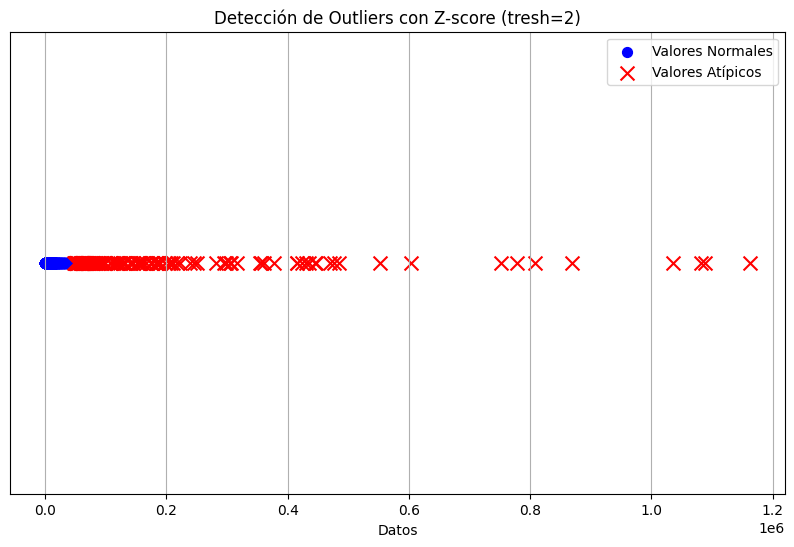

In [64]:
outliers = detect_outliers_zscore(df2['Number of Votes'], threshold=2)
plot_outliers(df2['Number of Votes'], outliers)

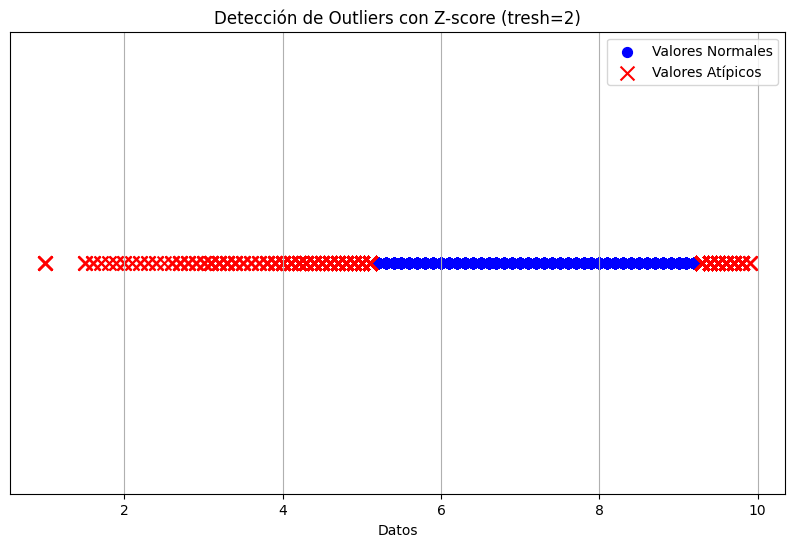

In [65]:
outliers = detect_outliers_zscore(df2['User Rating'], threshold=2)
plot_outliers(df2['User Rating'], outliers)

In [77]:
#Haremos dummies para separar la columna de genero, de esta manera tenemos mas valores para comparar o buscar correlaciones, de ser necesarias para especificar informacion.
df4 = df2['Genre'].str.split(', ').str.join('|').str.get_dummies()

In [80]:
df4.sum()

,0
Action,20563
Adventure,19622
Animation,44839
Biography,26
Comedy,17638
Crime,389
Documentary,48
Drama,7406
Family,5283
Fantasy,2456


Con la separacion de dummies se logra distinguir mucho mejor las categorias con las cuales se puede separar las series, ademas de distribuirlas mucho mejor en preparacion de un modelo de ML.

Ahora analizaremos las correlaciones vigentes existentes en nuestras Base de datos, vamos a considerar solo las variables numericas por el momento.

In [86]:
#Definiremos una formula que nos ayudara a agilizar el procedimiento de graficacion y modelacion de columnas.
def plot_lmplot_with_pearson(dataframe, variable1, variable2):
  # Calcula la correlación de Pearson
  corr = dataframe[variable1].corr(dataframe[variable2])
  # Crea el gráfico de dispersión con una recta de regresión lineal
  sns.lmplot(x=variable1, y=variable2, data=dataframe)
  # Anota la correlación en el gráfico
  plt.text(0.1, 0.9, f'Correlación de Pearson: {corr:.2f}',
  transform=plt.gca().transAxes, fontsize=12)
  # Muestra el gráfico
  plt.show()


In [68]:
#Mediremos correlacion solo de las variables numericas
df2[['Year', 'Gross', 'Number of Votes', 'User Rating']].corr()

,Year,Gross,Number of Votes,User Rating
Year,1.000000,0.049384,0.049384,0.138691
Gross,0.049384,1.000000,1.000000,0.051416
Number of Votes,0.049384,1.000000,1.000000,0.051416
User Rating,0.138691,0.051416,0.051416,1.000000


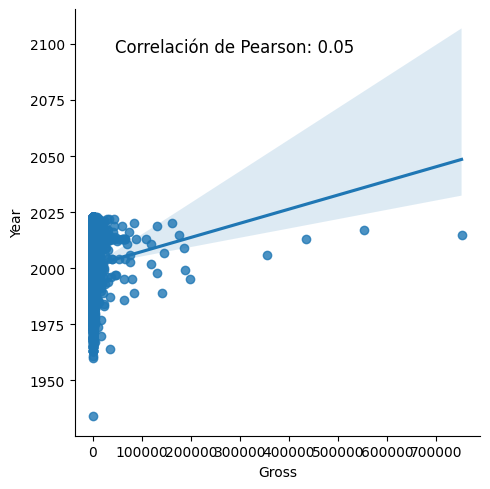

In [69]:
plot_lmplot_with_pearson(df2, 'Gross', 'Year')

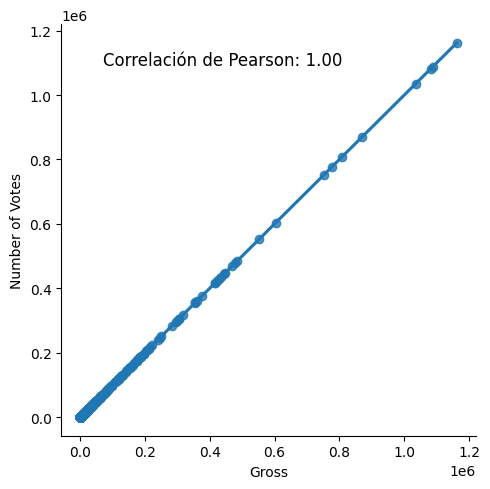

In [70]:
plot_lmplot_with_pearson(df2, 'Gross', 'Number of Votes')

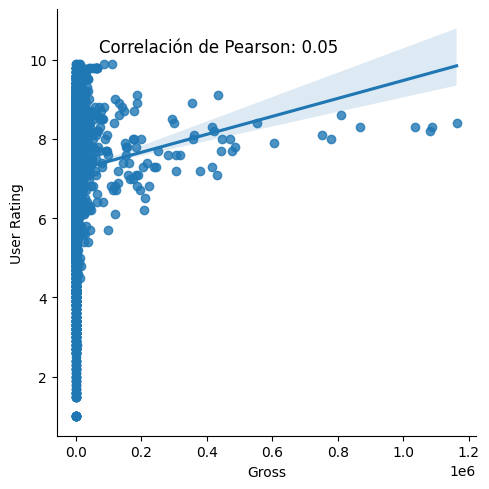

In [71]:
plot_lmplot_with_pearson(df2, 'Gross', 'User Rating')

Dentro del analisis hecho, con la base de correlacion de Pearson, notamos que hay una relacion directa solo con una valor en especifico, el de Numero de Votos con Ganancias, mientras mas voten, mas ingresos hay en el Anime que se este mirando.

Creo que con esto ya es suficiente para poder analisar correctamente esta alternativa, las demas cuentan con las formulas pertinentes y apartadas para hacer analisis en caso de necesitar otra variable positiva.

Utilizaremos dos modelos de discriminacion para saber cuales son las columnas con mejor correlacion entre ellas.

* a. Filtros basados en correlaciones
* b. Forward Selection

Compara ambos métodos y responde si coincide lo resultante con lo obtenido en el
análisis exploratorio.


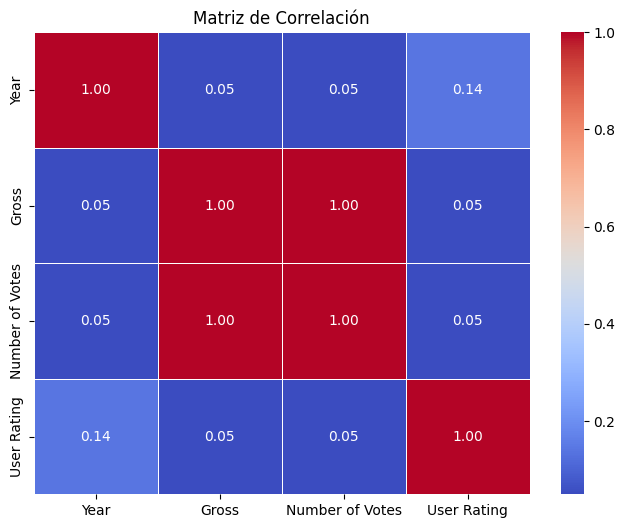

In [85]:
#A Filtros Basados en Correlaciones

import seaborn as sns
import matplotlib.pyplot as plt

# Calcular la matriz de correlación
corr_matrix = df2[['Year', 'Gross', 'Number of Votes', 'User Rating']].corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Matriz de Correlación")
plt.show()

# Eliminar variables con alta correlación (mayor a 0.9)
threshold = 0.9
# Crear una lista de las columnas a eliminar
to_drop = [column for column in corr_matrix.columns if any(abs(corr_matrix[column]) > threshold)]
df_filtered = df2.drop(columns=to_drop)


In [73]:
#Vamos a apartar las variables numericas del DF anterior para poder trabajar con ellas sin mayor inconveniente
df3 = df2[['Gross', 'User Rating', 'Number of Votes', 'Year']]

In [81]:
#Vamos tambien a eliminar sus Nan
df3 = df3.dropna()

In [88]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44842 entries, 0 to 45716
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Action       44842 non-null  int64
 1   Adventure    44842 non-null  int64
 2   Animation    44842 non-null  int64
 3   Biography    44842 non-null  int64
 4   Comedy       44842 non-null  int64
 5   Crime        44842 non-null  int64
 6   Documentary  44842 non-null  int64
 7   Drama        44842 non-null  int64
 8   Family       44842 non-null  int64
 9   Fantasy      44842 non-null  int64
 10  Game-Show    44842 non-null  int64
 11  History      44842 non-null  int64
 12  Horror       44842 non-null  int64
 13  Music        44842 non-null  int64
 14  Musical      44842 non-null  int64
 15  Mystery      44842 non-null  int64
 16  News         44842 non-null  int64
 17  Reality-TV   44842 non-null  int64
 18  Romance      44842 non-null  int64
 19  Sci-Fi       44842 non-null  int64
 20  Short      

In [84]:
#B Correlacion via Forward Selection

from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LogisticRegression

# Crear un modelo base (por ejemplo, Regresión Logística)
base_model = LogisticRegression()

# Separamos variables X e Y pero eliminamos para que no se topen
X = df3.drop('Gross', axis=1)  # Las características (X)
y = df3['Gross']  # La variable objetivo (y)

# Utilizar Forward Selection para seleccionar características
sfs = SequentialFeatureSelector(base_model, n_features_to_select=2,
                                direction='forward', scoring='accuracy', cv=5)

# Ajustar el selector de características
sfs.fit(X, y)

# Obtener las características seleccionadas
selected_features = X.columns[sfs.support_]

# Imprimir las características seleccionadas
print("Características seleccionadas por Forward Selection:")
print(selected_features)


Características seleccionadas por Forward Selection:
Index(['User Rating', 'Year'], dtype='object')


En comparacion, ambos metodos nos sugieren las mismas columnas, ya que necesitamos calcular el valor de 'Gross', para el metodo de correlacion, ambas columnas, 'User Rating' y 'Year' tenian un 0,5 de valor para analizar. En adición, el analisis via Forward Selection, sugieren lo mismo.